In [2]:
%matplotlib inline

import csv as csv
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.colors import LogNorm

# Read Data 

In [3]:
df_train = pd.read_csv('./train/train.csv')
df_train.reindex(np.random.permutation(df_train.index))
df_test = pd.read_csv('./test/test.csv')

In [4]:
print(df_train.describe())

                row_id                x                y         accuracy  \
count  29118021.000000  29118021.000000  29118021.000000  29118021.000000   
mean   14559010.000000         4.999770         5.001814        82.849125   
std     8405648.775656         2.857601         2.887505       114.751772   
min           0.000000         0.000000         0.000000         1.000000   
25%     7279505.000000         2.534700         2.496700        27.000000   
50%    14559010.000000         5.009100         4.988300        62.000000   
75%    21838515.000000         7.461400         7.510300        75.000000   
max    29118020.000000        10.000000        10.000000      1033.000000   

                  time      place_id  
count  29118021.000000  2.911802e+07  
mean     417010.364723  5.493787e+09  
std      231176.146498  2.611088e+09  
min           1.000000  1.000016e+09  
25%      203057.000000  3.222911e+09  
50%      433922.000000  5.518573e+09  
75%      620491.000000  7.764307e

## Split Data 

In [5]:
x = df_train[df_train.columns[1:5]]
y = df_train['place_id']

In [12]:
print(x)

               x       y  accuracy    time
0         0.7941  9.0809        54  470702
1         5.9567  4.7968        13  186555
2         8.3078  7.0407        74  322648
3         7.3665  2.5165        65  704587
4         4.0961  1.1307        31  472130
5         3.8099  1.9586        75  178065
6         6.3336  4.3720        13  666829
7         5.7409  6.7697        85  369002
8         4.3114  6.9410         3  166384
9         6.3414  0.0758        65  400060
10        2.0173  4.8627         6   21353
11        8.7101  2.9442        73  153493
12        0.8829  1.3445        64  574488
13        2.4336  8.0600        62  238054
14        6.1550  1.9774         8  325411
15        7.6219  9.6208        65  321519
16        3.2494  3.2096        75  777982
17        0.7084  8.9051        69  320633
18        2.7256  1.0135        54    6249
19        4.2683  1.8238        70  411437
20        5.3298  6.3457        52  736113
21        4.2830  3.1855        62  500479
22        9

In [ ]:
print(y)

## Visualization

### Result Visualization

There is a underlying distribution for the result data. As can easily be seen the data is skewed to the left.

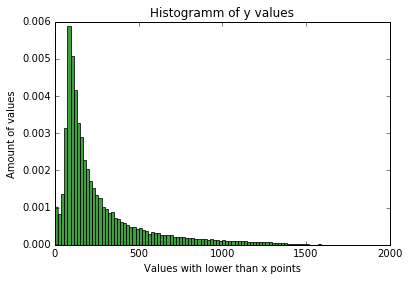

In [8]:
n, bins, patchs = plt.hist(df_train['place_id'].value_counts(), normed = 1, facecolor ='green', alpha = 0.75, bins = 100)
plt.title('Histogramm of y values')
plt.xlabel('Values with lower than x points')
plt.ylabel('Amount of values')
plt.show()

### Time Visualization 

Looking for dependence of time to other variables

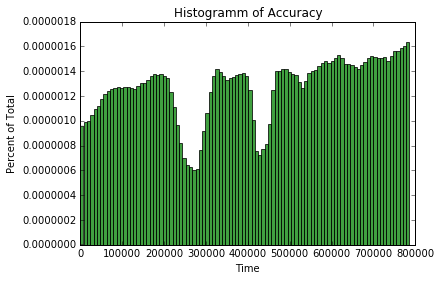

In [27]:
n, bins, patchs = plt.hist(df_train['time'], normed = 1, facecolor ='green', alpha = 0.75, bins = 100)
plt.title('Histogramm of Accuracy')
plt.xlabel('Time')
plt.ylabel('Percent of Total')
plt.show()

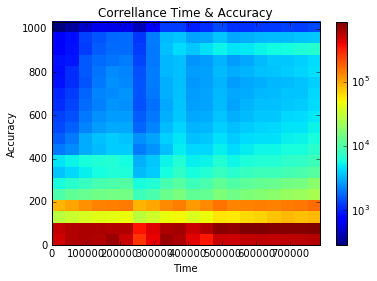

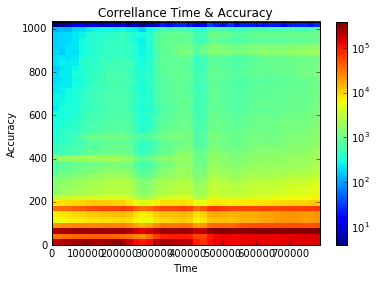

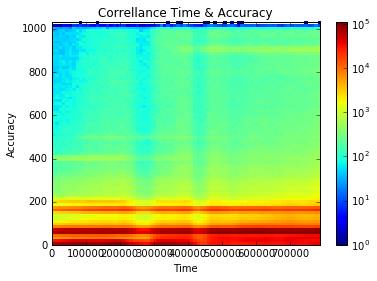

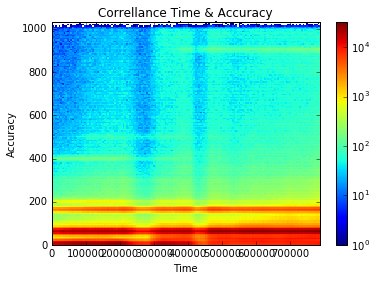

In [19]:
bins = 20
while bins <= 160:
    plt.hist2d(df_train['time'],df_train['accuracy'], bins = bins, norm=LogNorm())
    plt.colorbar()
    plt.title('Correllance Time & Accuracy')
    plt.xlabel('Time')
    plt.ylabel('Accuracy')
    plt.show()
    bins*=2

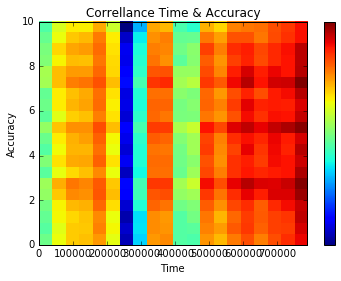

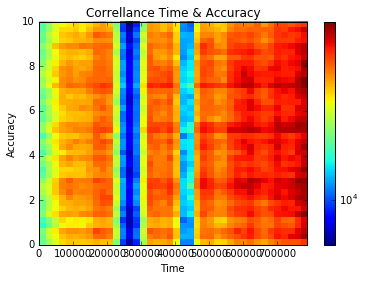

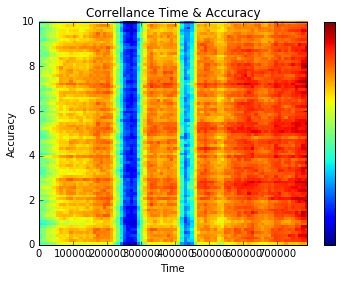

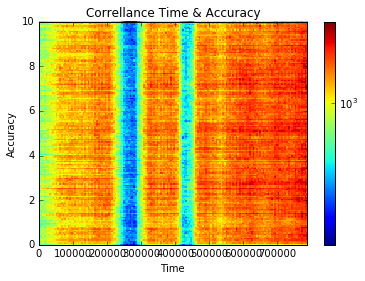

In [23]:
bins = 20
while bins <= 160:
    plt.hist2d(df_train['time'],df_train['x'], bins = bins, norm=LogNorm())
    plt.colorbar()
    plt.title('Correllance Time & Location')
    plt.xlabel('Time')
    plt.ylabel('x')
    plt.show()
    bins*=2

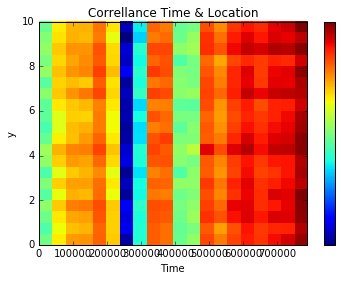

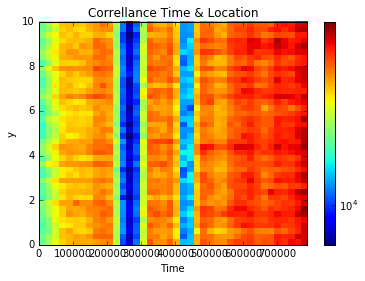

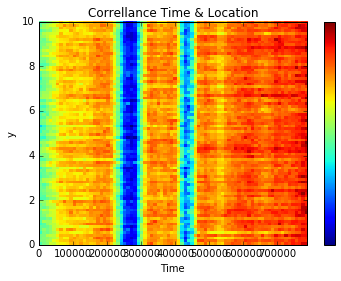

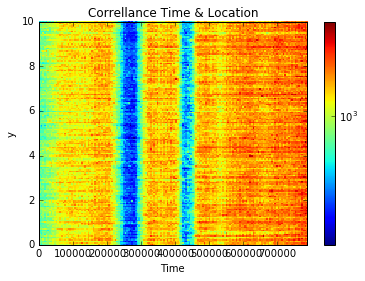

In [28]:
bins = 20
while bins <= 160:
    plt.hist2d(df_train['time'],df_train['y'], bins = bins, norm=LogNorm())
    plt.colorbar()
    plt.title('Correllance Time & Location')
    plt.xlabel('Time')
    plt.ylabel('y')
    plt.show()
    bins*=2

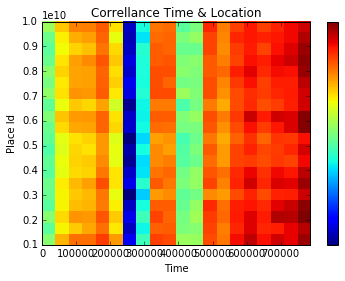

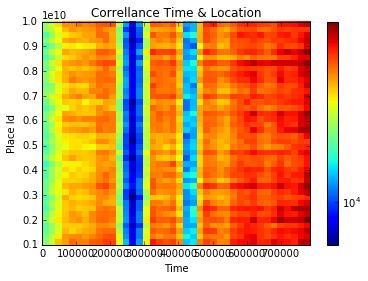

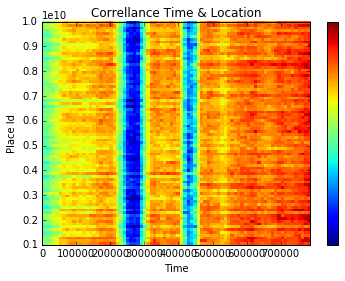

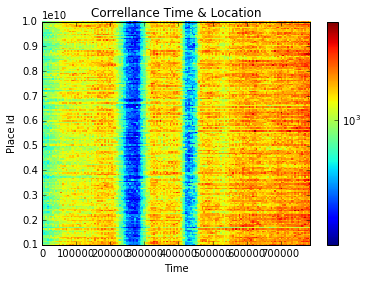

In [29]:
bins = 20
while bins <= 160:
    plt.hist2d(df_train['time'],df_train['place_id'], bins = bins, norm=LogNorm())
    plt.colorbar()
    plt.title('Correllance Time & Location')
    plt.xlabel('Time')
    plt.ylabel('Place Id')
    plt.show()
    bins*=2b

### Accuracy



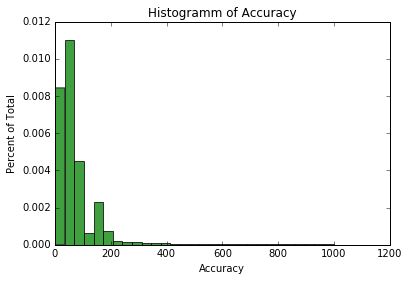

In [31]:
n, bins, patchs = plt.hist(df_train['accuracy'], normed = 1, facecolor ='green', alpha = 0.75, bins = 30)
plt.title('Histogramm of Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Percent of Total')
plt.show()

# Classification based on KClusters

In [6]:
num_clusters = 10000
clusterIdx = y.value_counts()[:num_clusters].keys().get_values()

In [ ]:
print(clusterIdx)

In [24]:
clusters = []
i = 0

for cluster in clusterIdx:
    print(i)
    i = i + 1
    temp = [0, 0, 0, 0]
    tempNum = 0
    for row in df_train.get_values():
        if row[5] == cluster:
            temp[0] += row[1]
            temp[1] += row[2]
            temp[2] += row[3]
            temp[3] += row[4]
            tempNum = tempNum + 1
    temp[0] /= tempNum
    temp[1] /= tempNum
    temp[2] /= tempNum
    temp[3] /= tempNum
    clusters.append(temp)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
for row in x[:5].get_values():
    print(row)

In [23]:
print(df_test[:5].get_values())

[[  0.00000000e+00   1.67500000e-01   1.36080000e+00   1.07000000e+02
    9.30883000e+05]
 [  1.00000000e+00   7.39090000e+00   2.53010000e+00   3.50000000e+01
    8.93017000e+05]
 [  2.00000000e+00   8.09780000e+00   2.34730000e+00   6.20000000e+01
    9.76933000e+05]
 [  3.00000000e+00   9.99000000e-01   1.05910000e+00   6.20000000e+01
    9.07285000e+05]
 [  4.00000000e+00   6.67000000e-01   9.72540000e+00   4.00000000e+01
    9.14399000e+05]]


In [19]:
print(clusters)

[[2.94699534883721, 8.287941535965393, 71.382368848025962, 422902.66035694972], [3.184730188679239, 1.3939170921198683, 88.150388457269699, 419974.13318534964], [6.7910313602732062, 3.6641040978941279, 82.878201479795109, 154491.45361411496], [5.7169327387802058, 5.5317547756041376, 91.845224395857301, 319462.17548906791], [2.8029363213038456, 5.6808775902211757, 92.415017462165309, 221343.42083818393], [3.0057413752913753, 8.4536868298368173, 83.44055944055944, 275684.75466200465], [7.4521997649823826, 1.5853522326674478, 110.01880141010575, 593932.51586368983], [1.8283762213066463, 3.7118540317834112, 69.228369629193637, 261296.3237198352], [5.3346904061212514, 4.8304803413772932, 93.604473219540907, 388054.65097115951], [1.5665561134081543, 1.7987003544004723, 84.953927938570587, 230530.85823981097]]


In [ ]:
%store foo >> test.txt
for row in df_test.get_values():
    minDist = [999999999, 99999999, 99999999]
    curClust = [-1,-1,-1]
    for i, cluster in enumerate(clusters):
        dist = abs(cluster[0] - row[1]) + abs(cluster[1] - row[2]) + abs(cluster[2] - row[3]) +abs(cluster[3] - row[4])

        if minDist[2] > dist:
            minDist[2] = dist
            curClust[2] = clusterIdx[i]
        
        if minDist[1] > minDist[2]:
            minDist[2], minDist[1] = minDist[1], minDist[2]
            curClust[2], curClust[1] = curClust[1], curClust[2]
        
        if minDist[0] > minDist[1]:
            minDist[1], minDist[0] = minDist[0], minDist[1]
            curClust[1], curClust[0] = curClust[0], curClust[1]
        
    foo = " " + row[0] + " " + curClust[0] + " " + curClust[1] +  " " + curClust[2]
        

### Random Forests 

Unfortunately take too long to train. It uses an one vs all classifier and therefore has to train 100k models which takes way too long.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, x, y)

print(score.mean())